# 1. Problem Description

Building a CNN model to classify fashion clothing images from Zalando- Fashion-mnist. This data set consists of 
70,000 28x28 images of which train consists of 60,000 images and test consists of 10,000 images. The images consists of 10 classes.

- 0: T-shirt/top
- 1: Trouser
- 2: Pullover
- 3: Dress
- 4: Coat
- 5: Sandal
- 6: Shirt
- 7: Sneaker
- 8: Bag
- 9: Ankle boot


More information can be obtained from: 
- https://keras.io/api/datasets/fashion_mnist/
- https://github.com/zalandoresearch/fashion-mnist





## Objective: Classify images as appropriate labels

In [1]:
from platform import python_version
print(python_version())

3.7.12


In [2]:
import tensorflow as tf
tf.__version__

'2.8.0'



1.   List item
2.   List item



In [3]:
#! pip install keras-Tuner

In [4]:
import keras

from keras.datasets import fashion_mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 

**Let us download the dataset.**

In [5]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [6]:
## Each image is a 28 x 28  numpy array
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

0


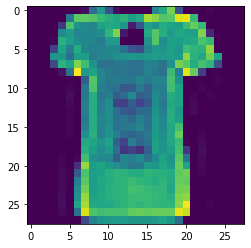

In [7]:
## Let's look at one of the images

print(y_train[444])
plt.imshow(x_train[444]);

In [8]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

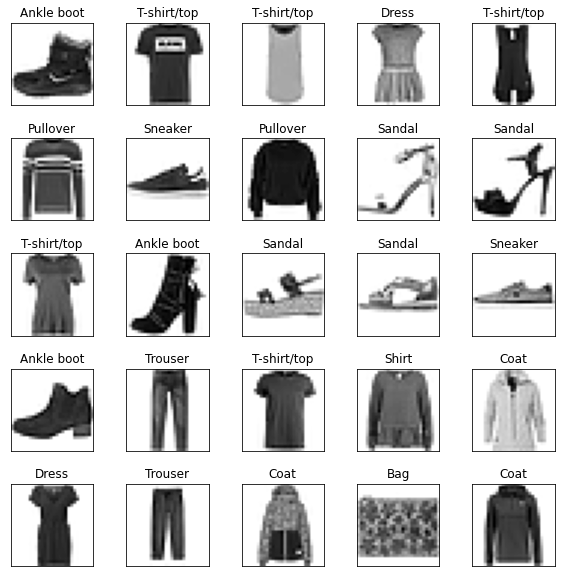

In [9]:
#Lets look at first 25 images from our training data set

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.subplots_adjust(hspace=.4)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.title(class_names[y_train[i]])
plt.show()

In [10]:
from keras import utils as np_utils

num_classes = 10

y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [11]:
# now instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position
y_train[444]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
# As before, let's make everything float and scale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

In [13]:
## Let us convert images to 28 x 28 x 1
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

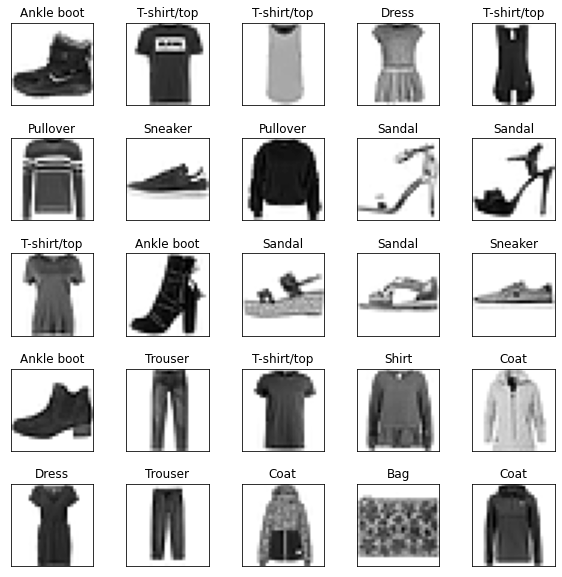

In [14]:
#Lets look at first 25 images from our training data set after changing the shape 

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.subplots_adjust(hspace=.4)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i][:, :, 0], cmap=plt.cm.binary)
    result = np.where(y_train[i]== 1)
    plt.title(class_names[result[0][0]])
    
plt.show()

# Keras Layers for CNN's 

### Conv2D

```python
keras.layers.convolutional.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
```

A few parameters explained:
- `filters`: the number of filter used per location.  In other words, the depth of the output.
- `kernel_size`: an (x,y) tuple giving the height and width of the kernel to be used
- `strides`: and (x,y) tuple giving the stride in each dimension.  Default is `(1,1)`
- `input_shape`: required only for the first layer

Note, the size of the output will be determined by the kernel_size, strides

### MaxPooling2D
`keras.layers.pooling.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)`

- `pool_size`: the (x,y) size of the grid to be pooled.
- `strides`: Assumed to be the `pool_size` unless otherwise specified

### Flatten
Turns its input into a one-dimensional vector (per instance).  Usually used when transitioning between convolutional layers and fully connected layers.




In [15]:
# Let's build a CNN using Keras' Sequential capabilities


model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 32)        832       
                                                                 
 activation (Activation)     (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 32)          25632     
                                                                 
 activation_1 (Activation)   (None, 5, 5, 32)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 2, 32)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 2, 2, 32)          0         
                                                        

In [16]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

batch_size = 32

# initiate RMSprop optimizer
opt = RMSprop(learning_rate=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=10,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/10
1875/1875 [==============================] - 13s 4ms/step - loss: 0.6624 - accuracy: 0.7571 - val_loss: 0.4838 - val_accuracy: 0.8191
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4783 - accuracy: 0.8221 - val_loss: 0.4230 - val_accuracy: 0.8391
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4321 - accuracy: 0.8367 - val_loss: 0.3971 - val_accuracy: 0.8554
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4040 - accuracy: 0.8484 - val_loss: 0.3719 - val_accuracy: 0.8595
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3805 - accuracy: 0.8579 - val_loss: 0.3547 - val_accuracy: 0.8682
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3621 - accuracy: 0.8633 - val_loss: 0.3575 - val_accuracy: 0.8652
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3516 - accuracy: 0.8687 - val_loss: 0.3424 - val_accuracy

## Complex Model

In [17]:
# Let's build a CNN using Keras' Sequential capabilities

model_2 = Sequential()

model_2.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))
model_2.add(Conv2D(32, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(64, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

In [18]:
## Check number of parameters

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 activation_4 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 activation_5 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 32)        0         
                                                      

In [19]:
# initiate RMSprop optimizer
opt_2 = RMSprop(learning_rate=0.0005)

# Let's train the model using RMSprop
model_2.compile(loss='categorical_crossentropy',
              optimizer=opt_2,
              metrics=['accuracy'])

In [20]:
model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5025 - accuracy: 0.8178 - val_loss: 0.3351 - val_accuracy: 0.8773
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3229 - accuracy: 0.8851 - val_loss: 0.2875 - val_accuracy: 0.8973
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2911 - accuracy: 0.8962 - val_loss: 0.2658 - val_accuracy: 0.9048
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2769 - accuracy: 0.9034 - val_loss: 0.2559 - val_accuracy: 0.9085
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2707 - accuracy: 0.9051 - val_loss: 0.2704 - val_accuracy: 0.9074


### The complex model does a better job.

# Hyperparameter Tuning with Keras Tuner

In [21]:
def build_model(hp):
    
    model = Sequential([
        
            Conv2D(filters = hp.Int('conv1_filter', min_value = 32, max_value = 128, step= 32),
            kernel_size = hp.Choice('conv1_kernel', values=[3,5]),
            activation = 'relu',
            input_shape = (28, 28, 1)
            ),
        
            Conv2D(
            filters = hp.Int('conv2_filter', min_value = 32, max_value = 128, step= 32),
            kernel_size = hp.Choice('conv2_kernel', values=[3,5]),
            activation = 'relu',
            input_shape = (28, 28, 1)
            ),
        
        
            Flatten(),
        
            Dense(units = hp.Int('dense1_units', min_value = 32, max_value = 128, step = 32),
            activation = 'relu'),
        
            Dense(num_classes, 'softmax')
        
    ])
    

    model.compile( optimizer= Adam(hp.Choice('learning_rate', values =[1e-2,5e-3,1e-3])),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])
    
    return model 
    

In [22]:
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [23]:
tuner = RandomSearch(build_model, objective='val_accuracy', max_trials= 5, seed = 101, 
                            directory = 'output', project_name = 'Fashion_MNIST')

INFO:tensorflow:Reloading Oracle from existing project output/Fashion_MNIST/oracle.json
INFO:tensorflow:Reloading Tuner from output/Fashion_MNIST/tuner0.json


In [24]:
tuner.search_space_summary()

Search space summary
Default search space size: 6
conv1_filter (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': None}
conv1_kernel (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
conv2_filter (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': None}
conv2_kernel (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
dense1_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.005, 0.001], 'ordered': True}


In [25]:
tuner.search(x_train,y_train, epochs =5, validation_split = 0.1)

INFO:tensorflow:Oracle triggered exit


In [26]:
tuner.results_summary(1) #Best results summary 

Results summary
Results in output/Fashion_MNIST
Showing 1 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
conv1_filter: 32
conv1_kernel: 3
conv2_filter: 128
conv2_kernel: 5
dense1_units: 64
learning_rate: 0.001
Score: 0.9179999828338623


In [27]:
model = tuner.get_best_models(num_models= 1)[0] #Best model 

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 128)       102528    
                                                                 
 flatten (Flatten)           (None, 61952)             0         
                                                                 
 dense (Dense)               (None, 64)                3964992   
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 4,068,490
Trainable params: 4,068,490
Non-trainable params: 0
_________________________________________________________________


In [29]:
batch_size = 32
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0889 - accuracy: 0.9697 - val_loss: 0.3179 - val_accuracy: 0.9104
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0521 - accuracy: 0.9810 - val_loss: 0.3437 - val_accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0373 - accuracy: 0.9862 - val_loss: 0.4567 - val_accuracy: 0.9099
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0309 - accuracy: 0.9891 - val_loss: 0.4798 - val_accuracy: 0.9089
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0236 - accuracy: 0.9916 - val_loss: 0.5286 - val_accuracy: 0.9082


# Summary 

1.   **A complex CNN Models does a better prediction on validation than a simpler model (88 % vs 91 %)**
2.   **Keras Tuner can be used to tune hyperparameters.**

# Next Steps

1.   **Data Augmentation (rotation, flipping and so on.) could lead to better accuracy.**

